In [ ]:
##importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
##Importing the dataset
data=pd.read_csv('TSLA_new.csv')
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,profit/loss
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.0
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-1.0
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-1.0
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-1.0
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-1.0


In [ ]:
data1=data.iloc[:,[2,3,4,5,6,7]]
data1.head()

,Open,High,Low,Close,Adj Close,Volume
0,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
##Scaling the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1=scaler.fit_transform(data1)
dfx=pd.DataFrame(data=data1, columns=['Open','High','Low','Close','Adj Close','Volume'])
dfx.head()

,Open,High,Low,Close,Adj Close,Volume
0,-0.615400,-0.611338,-0.616832,-0.612359,-0.612359,2.276439
1,-0.610680,-0.607656,-0.612721,-0.612401,-0.612401,1.987486
2,-0.611229,-0.610713,-0.614884,-0.613703,-0.613703,0.346520
3,-0.612619,-0.612629,-0.615997,-0.615624,-0.615624,-0.216857
4,-0.614705,-0.614736,-0.618053,-0.617774,-0.617774,0.099157


In [ ]:
X=dfx.copy()
X=X.drop("Adj Close", axis=1)

y=dfx['Adj Close']

In [ ]:
X.head()

,Open,High,Low,Close,Volume
0,-0.615400,-0.611338,-0.616832,-0.612359,2.276439
1,-0.610680,-0.607656,-0.612721,-0.612401,1.987486
2,-0.611229,-0.610713,-0.614884,-0.613703,0.346520
3,-0.612619,-0.612629,-0.615997,-0.615624,-0.216857
4,-0.614705,-0.614736,-0.618053,-0.617774,0.099157


In [ ]:
y.head()

0   -0.612359
1   -0.612401
2   -0.613703
3   -0.615624
4   -0.617774
Name: Adj Close, dtype: float64

In [ ]:
##X=X.values.reshape(-1,1)##This extracts a numpy array and converts it into 2D shape.
##y=y.values.reshape(-1,1)

In [ ]:
##Separating the features and target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set input: ",X_train.shape)
print("Test set input: ",X_test.shape)

Training set input:  (2553, 5)
Test set input:  (639, 5)


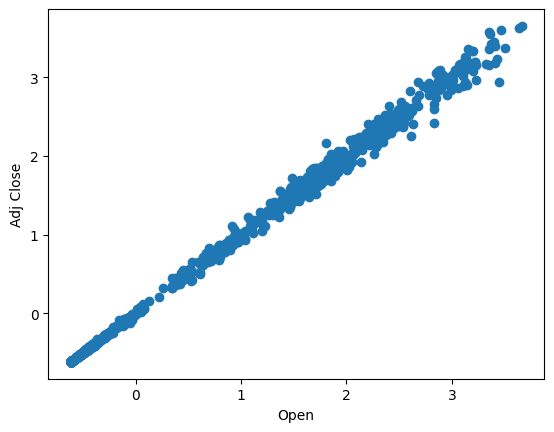

In [ ]:
##Creating a scatter plot
plt.scatter(X['Open'], y)
##plt.scatter(X, y)
plt.xlabel('Open')
plt.ylabel('Adj Close')
plt.show()

In [ ]:
#Creating a linear regression model
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

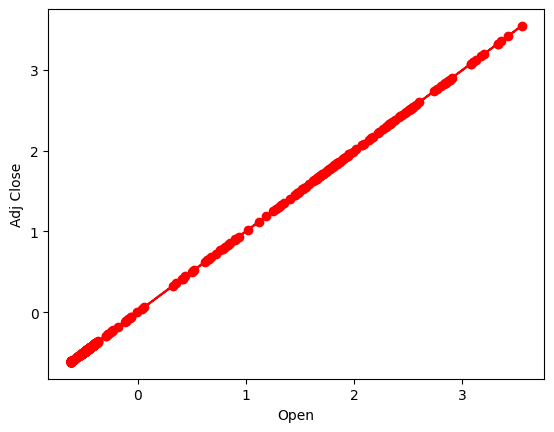

In [ ]:
##model performance
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
plt.xlabel('Open')
plt.ylabel('Adj Close')
plt.plot(y_test, y_pred, color='red', marker='o')

In [ ]:
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , lr.intercept_)
print("Slope :" , lr.coef_)

Mean Squared Error :  1.4879653187584095e-32
R-Squared : 1.0
Y-intercept : 0.0
Slope : [ 1.02499161e-15 -2.66453526e-15  2.49800181e-15  1.00000000e+00
  2.94902991e-17]
